# Univariate Time Series Prediction

In [100]:
import pandas as pd            ## importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
from keras.layers import LSTM , Dense , Dropout , Bidirectional
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [101]:
df = pd.read_csv('/content/Google.csv')  ## Importing Data

In [102]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004-08-19
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25


In [103]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
dataset = df.iloc[:,4]

In [106]:
dataset.head()

0    2.499133
1    2.697639
2    2.724787
3    2.611960
4    2.640104
Name: Adj Close, dtype: float64

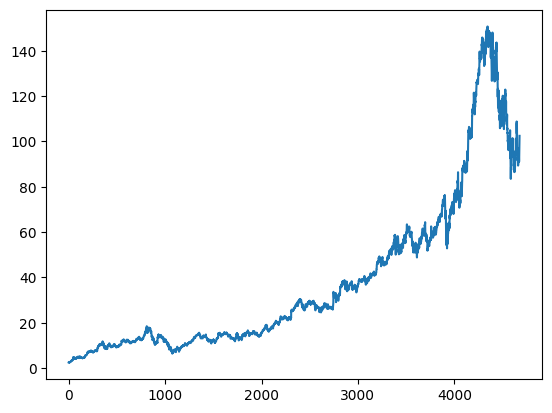

In [107]:
plt.plot(dataset)   # Plotting adj close price 

In [108]:
dataset = np.array(dataset).reshape(-1,1)  ## Reshaping data to 2d

In [109]:
mms = MinMaxScaler()            ##Scaling data
dataset = mms.fit_transform(dataset)

In [110]:
def datagen(data , window):              ## Creating function to make data transformation with respect to look back period
  x = [] 
  y = []
  for i in range(len(data)-window):
    a = data[i:i+window]
    x.append(a)
    b = data[i+window]
    y.append(b)
  return np.array(x),np.array(y)

In [111]:
x_new = datagen(dataset , 100)

In [112]:
x_new

(array([[[5.54601395e-05],
         [1.39474256e-03],
         [1.57790515e-03],
         ...,
         [1.48783124e-02],
         [1.57689272e-02],
         [1.59722564e-02]],
 
        [[1.39474256e-03],
         [1.57790515e-03],
         [8.16681841e-04],
         ...,
         [1.57689272e-02],
         [1.59722564e-02],
         [1.57168354e-02]],
 
        [[1.57790515e-03],
         [8.16681841e-04],
         [1.00656502e-03],
         ...,
         [1.59722564e-02],
         [1.57168354e-02],
         [1.60260275e-02]],
 
        ...,
 
        [[6.59832347e-01],
         [6.61451568e-01],
         [6.67861073e-01],
         ...,
         [5.97221913e-01],
         [6.01607353e-01],
         [6.19081578e-01]],
 
        [[6.61451568e-01],
         [6.67861073e-01],
         [6.77913813e-01],
         ...,
         [6.01607353e-01],
         [6.19081578e-01],
         [6.34599273e-01]],
 
        [[6.67861073e-01],
         [6.77913813e-01],
         [6.91137564e-01],
         

In [113]:
y = x_new[1]       ## output label
y.shape

(4577, 1)

In [114]:
x = x_new[0]     ## Input features
x.shape

(4577, 100, 1)

In [115]:
test_size = int((x.shape[0])*0.4)             ## Splitting data to train and test
x_train = x[:(x.shape[0]-test_size)]
x_test = x[(x.shape[0]-test_size):]
y_train = y[:(x.shape[0]-test_size)]
y_test = y[(x.shape[0]-test_size):]

In [116]:
print(x_train.shape)
print(y_train.shape)

(2747, 100, 1)
(2747, 1)


In [117]:
model = Sequential()                                     ## Building Deep Lstm model
model.add(LSTM(80, input_shape = (100,1),return_sequences = True))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100, 80)           26240     
                                                                 
 lstm_25 (LSTM)              (None, 100, 50)           26200     
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 72,691
Trainable params: 72,691
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(x_train, y_train, validation_data = (x_test , y_test) , epochs = 100 , batch_size =60)  ## Fitting data to model

Epoch 1/100
46/46 [==============================] - 7s 41ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 2/100
46/46 [==============================] - 1s 16ms/step - loss: 1.3421e-04 - val_loss: 7.3027e-04
Epoch 3/100
46/46 [==============================] - 1s 22ms/step - loss: 1.1467e-04 - val_loss: 0.0014
Epoch 4/100
46/46 [==============================] - 1s 24ms/step - loss: 9.0789e-05 - val_loss: 0.0011
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 8.3808e-05 - val_loss: 0.0011
Epoch 6/100
46/46 [==============================] - 1s 17ms/step - loss: 8.0877e-05 - val_loss: 8.6961e-04
Epoch 7/100
46/46 [==============================] - 1s 16ms/step - loss: 8.2932e-05 - val_loss: 7.3903e-04
Epoch 8/100
46/46 [==============================] - 1s 16ms/step - loss: 7.2831e-05 - val_loss: 0.0011
Epoch 9/100
46/46 [==============================] - 1s 17ms/step - loss: 7.3710e-05 - val_loss: 6.3619e-04
Epoch 10/100
46/46 [==============================] 

In [119]:
train_predict = model.predict(x_train)      ## predicting value for x_train and x_test
test_predict = model.predict(x_test)

58/58 [==============================] - 0s 6ms/step


In [120]:
train_predict = mms.inverse_transform(train_predict)      ## Scaling data back
test_predict = mms.inverse_transform(test_predict)

In [121]:
train_predict

array([[ 5.447927 ],
       [ 5.4758415],
       [ 5.5056987],
       ...,
       [37.768356 ],
       [37.883217 ],
       [37.958508 ]], dtype=float32)

In [122]:
y_train_sb = mms.inverse_transform(y_train)
y_test_sb = mms.inverse_transform(y_test)

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error       ## Calculting evaluation matrics
print(np.sqrt(mean_squared_error(y_train_sb,train_predict)))
print(mean_absolute_error(y_train_sb , train_predict))


0.5207199051235782
0.4179452440284753


In [124]:
print(np.sqrt(mean_squared_error(y_test_sb,test_predict)))
print(mean_absolute_error(y_test_sb,test_predict))

1.9669717184809912
1.3639040649914351


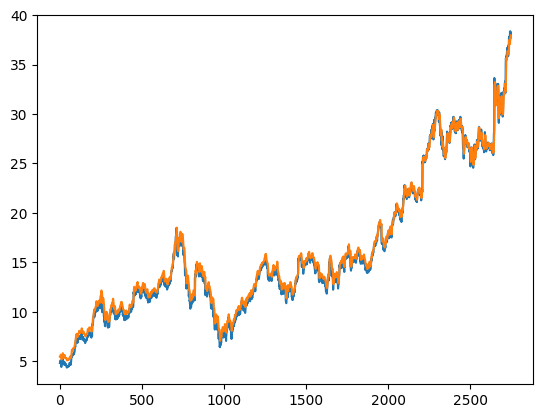

In [126]:
plt.plot(y_train_sb)                 ## Line graph to compare train data to prediction on train data
plt.plot(train_predict)

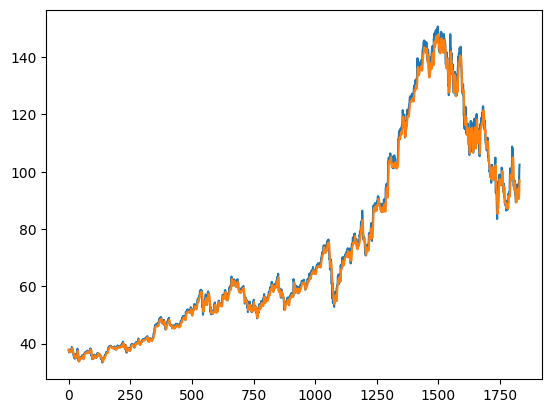

In [127]:
plt.plot(y_test_sb)              ## line plot to compare test data and prediction on test data
plt.plot(test_predict)

In [128]:
model2 = Sequential()

In [129]:
## Building Deep Bidirectional Lstm model
model2.add(Bidirectional(LSTM(80, input_shape = (100,1),return_sequences = True)))
model2.add(Bidirectional(LSTM(50,return_sequences = True)))
model2.add(Bidirectional(LSTM(50)))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 80)           26240     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           26200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 72,691
Trainable params: 72,691
Non-trainable params: 0
_________________________________________________________________


In [133]:
model2.fit(x_train , y_train , validation_data = (x_test , y_test),epochs =100 , batch_size =60)

Epoch 1/100
46/46 [==============================] - 16s 76ms/step - loss: 7.4283e-04 - val_loss: 0.0023
Epoch 2/100
46/46 [==============================] - 1s 30ms/step - loss: 1.1934e-04 - val_loss: 0.0015
Epoch 3/100
46/46 [==============================] - 1s 30ms/step - loss: 7.7876e-05 - val_loss: 0.0011
Epoch 4/100
46/46 [==============================] - 1s 30ms/step - loss: 7.1746e-05 - val_loss: 0.0016
Epoch 5/100
46/46 [==============================] - 2s 37ms/step - loss: 5.9308e-05 - val_loss: 8.1494e-04
Epoch 6/100
46/46 [==============================] - 2s 37ms/step - loss: 5.7420e-05 - val_loss: 6.3780e-04
Epoch 7/100
46/46 [==============================] - 1s 30ms/step - loss: 5.7300e-05 - val_loss: 0.0012
Epoch 8/100
46/46 [==============================] - 1s 30ms/step - loss: 5.9157e-05 - val_loss: 0.0013
Epoch 9/100
46/46 [==============================] - 1s 32ms/step - loss: 5.1866e-05 - val_loss: 5.5964e-04
Epoch 10/100
46/46 [==============================]

In [134]:
train_predict_model2 = model.predict(x_train)      ## predicting value for x_train and x_test
test_predict_model2 = model.predict(x_test)

58/58 [==============================] - 0s 5ms/step


In [135]:
train_predict_model2 = mms.inverse_transform(train_predict_model2)      ## Scaling data back
test_predict_model2 = mms.inverse_transform(test_predict_model2)

In [136]:
y_train_sb_model2 = mms.inverse_transform(y_train)
y_test_sb_model2 = mms.inverse_transform(y_test)

In [137]:
print(np.sqrt(mean_squared_error(y_train_sb_model2,train_predict_model2)))        ## Calculating evalution metrics
print(mean_absolute_error(y_train_sb_model2,train_predict_model2))

0.5207199051235782
0.4179452440284753


In [138]:
print(np.sqrt(mean_squared_error(y_test_sb_model2,test_predict_model2)))
print(mean_absolute_error(y_test_sb_model2,test_predict_model2))

1.9669717184809912
1.3639040649914351


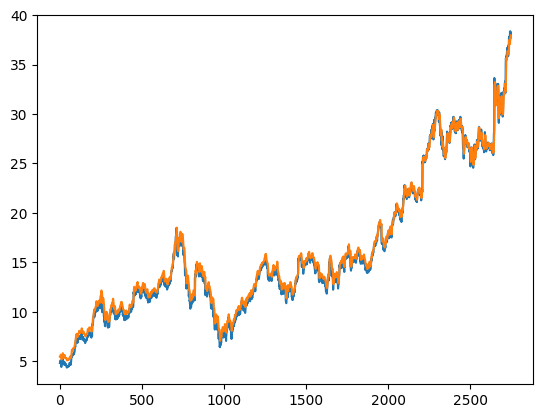

In [140]:
plt.plot(y_train_sb_model2)                 ## line plot to compare train data and prediction on train data
plt.plot(train_predict_model2)

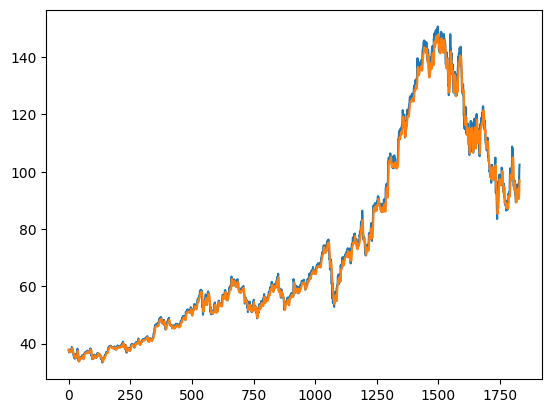

In [141]:
plt.plot(y_test_sb_model2)                ## line plot to compare test data and prediction on test data
plt.plot(test_predict_model2)

In [142]:
## Importing model to dump

In [143]:
import pickle

In [144]:
with open('model_lstm.pkl','wb') as file:
  pickle.dump(model,file)
with open('model_bidirectional_lstm.pkl','wb') as file:
  pickle.dump(model,file)